In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [2]:
df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df_validation = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df.set_index('PassengerId', inplace=True)

# Exploratory Data Analysis (EDA)

In [5]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


In [6]:
df.shape

(8693, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [8]:
df.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

<AxesSubplot:ylabel='None'>

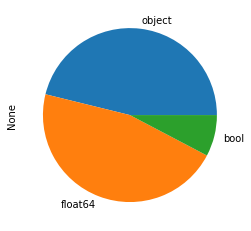

In [9]:
df.dtypes.value_counts().plot.pie()

In [10]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
df.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# Convert data types

In [12]:
df["VIP"] = df["VIP"].astype("category")

In [13]:
df["CryoSleep"] = df["CryoSleep"].astype("category")

In [14]:
df["Transported"] = df["Transported"].astype("int64")

# Exploring data

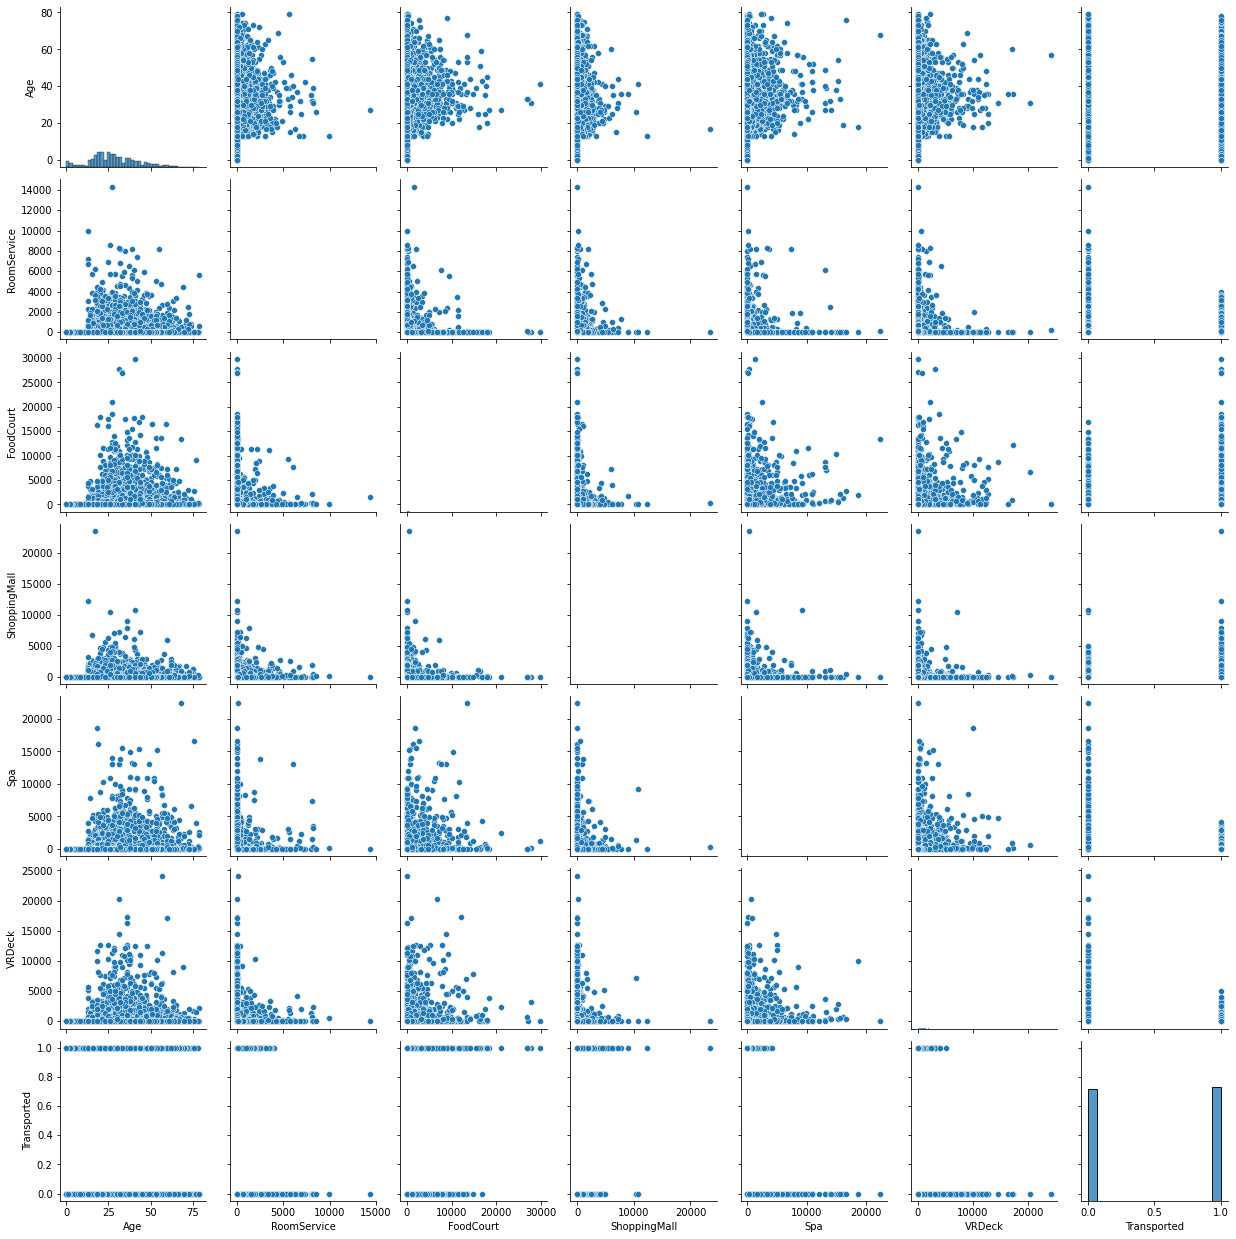

In [15]:
sns.pairplot(df)

## Numeric features

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

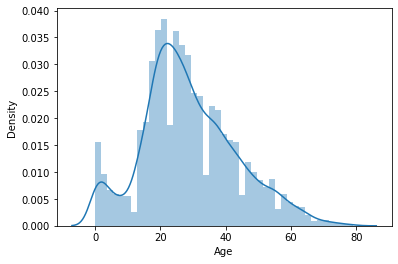

In [16]:
sns.distplot(df['Age'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


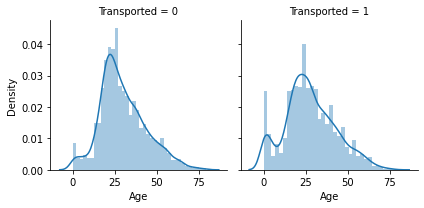

In [17]:
# Explore Age vs Transported
g = sns.FacetGrid(df, col='Transported')
g = g.map(sns.distplot, "Age")

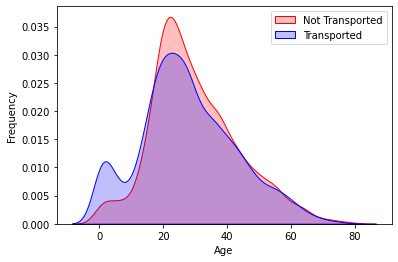

In [18]:
# Explore Age distibution 
g = sns.kdeplot(df["Age"][(df["Transported"] == 0) & (df["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["Age"][(df["Transported"] == 1) & (df["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Transported","Transported"])

A relative large part of children is transported.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


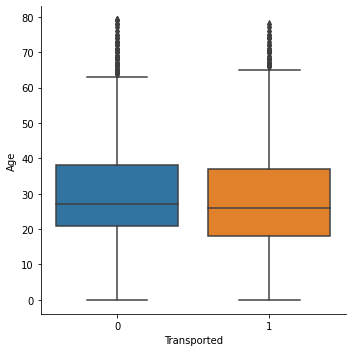

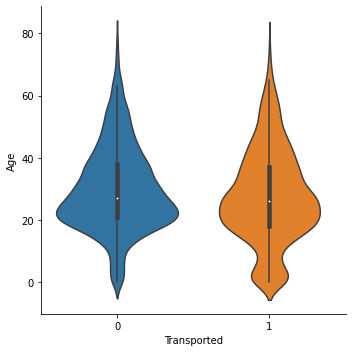

In [19]:
g = sns.factorplot(x="Transported", y = "Age",data = df, kind="box")
g = sns.factorplot(x="Transported", y = "Age",data = df, kind="violin")

In [20]:
df['AgeBand'] = pd.cut(df['Age'], 8)
print(df[['AgeBand', 'Transported']].groupby(['AgeBand'], as_index = False).mean().sort_values(by = 'AgeBand', ascending = True))
#df = train_df.drop('AgeBand', axis = 1)

           AgeBand  Transported
0  (-0.079, 9.875]     0.711340
1   (9.875, 19.75]     0.532792
2  (19.75, 29.625]     0.469225
3   (29.625, 39.5]     0.458790
4   (39.5, 49.375]     0.506679
5  (49.375, 59.25]     0.493716
6  (59.25, 69.125]     0.475962
7   (69.125, 79.0]     0.434783


### Home Planet

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


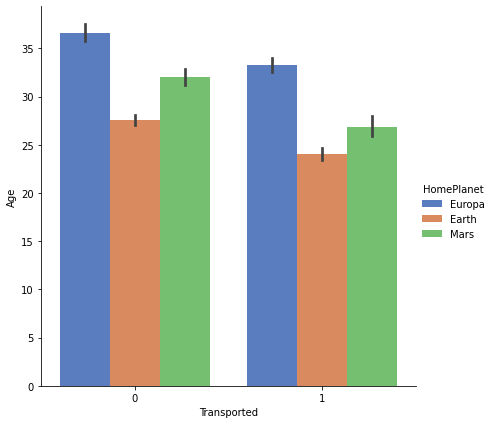

In [21]:
g = sns.catplot(x="Transported", y="Age", hue="HomePlanet", data=df,
                   size=6, kind="bar", palette="muted")
g = g.set_ylabels("Age")

### Room Service

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RoomService', ylabel='Density'>

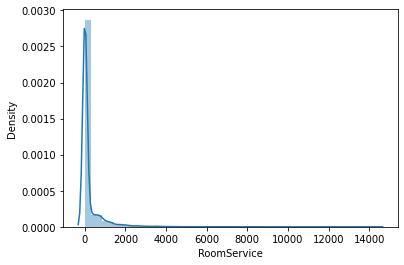

In [22]:
sns.distplot(df['RoomService'])

<AxesSubplot:xlabel='Transported', ylabel='RoomService'>

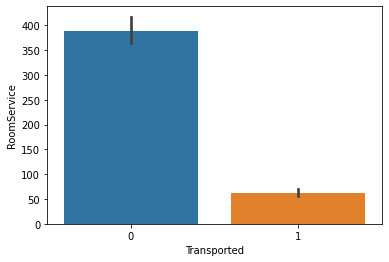

In [23]:
sns.barplot(x='Transported', y='RoomService', data=df)

<AxesSubplot:xlabel='Transported', ylabel='FoodCourt'>

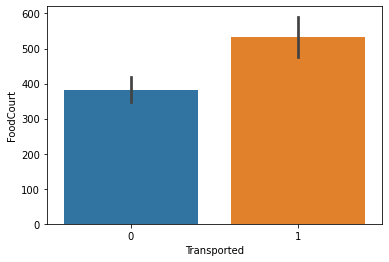

In [24]:
sns.barplot(x='Transported', y='FoodCourt', data=df)

<AxesSubplot:xlabel='Transported', ylabel='ShoppingMall'>

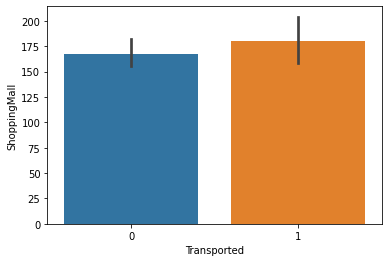

In [25]:
sns.barplot(x='Transported', y='ShoppingMall', data=df)

<AxesSubplot:xlabel='Transported', ylabel='Spa'>

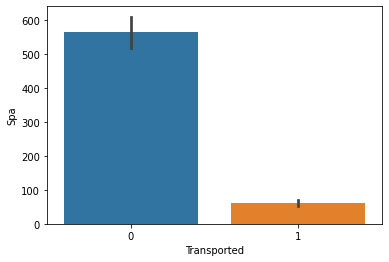

In [26]:
sns.barplot(x='Transported', y='Spa', data=df)

<AxesSubplot:xlabel='Transported', ylabel='VRDeck'>

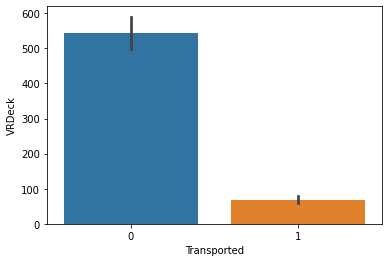

In [27]:
sns.barplot(x='Transported', y='VRDeck', data=df)

## Categorical variables

### Destination

In [28]:
df['Destination'].value_counts(normalize=True)

TRAPPIST-1e      0.694983
55 Cancri e      0.211491
PSO J318.5-22    0.093526
Name: Destination, dtype: float64

In [29]:
df[['Destination', 'Transported']].value_counts()

Destination    Transported
TRAPPIST-1e    0              3128
               1              2787
55 Cancri e    1              1098
               0               702
PSO J318.5-22  1               401
               0               395
dtype: int64

In [30]:
df.groupby('Destination')['Transported'].mean()

Destination
55 Cancri e      0.610000
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: float64

In [31]:
df[['Destination', 'Transported']].groupby(['Destination'], as_index=False).count().sort_values(by='Transported', ascending=False)

,Destination,Transported
2,TRAPPIST-1e,5915
0,55 Cancri e,1800
1,PSO J318.5-22,796


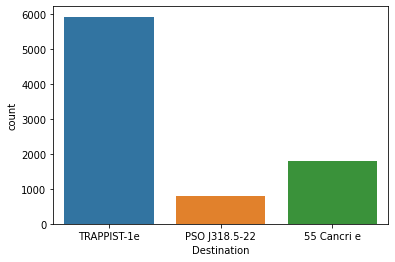

In [32]:
plt.figure()
sns.countplot(x=df['Destination'])
plt.show()

### Home Planet

In [33]:
df.groupby('HomePlanet')['Transported'].mean()

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: float64

In [34]:
df[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).count().sort_values(by='HomePlanet', ascending=False)

,HomePlanet,Transported
2,Mars,1759
1,Europa,2131
0,Earth,4602


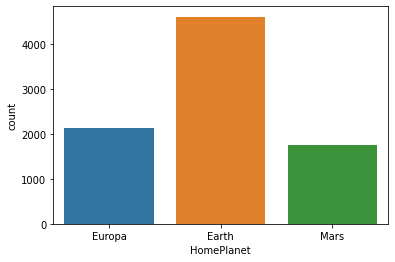

In [35]:
plt.figure()
sns.countplot(x=df['HomePlanet'])
plt.show()

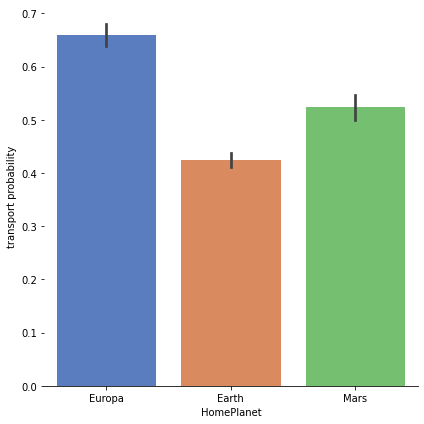

In [36]:
# Explore HomePlanet feature vs Transported
g = sns.catplot(x="HomePlanet",y="Transported",data=df,kind="bar", height = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("transport probability")

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


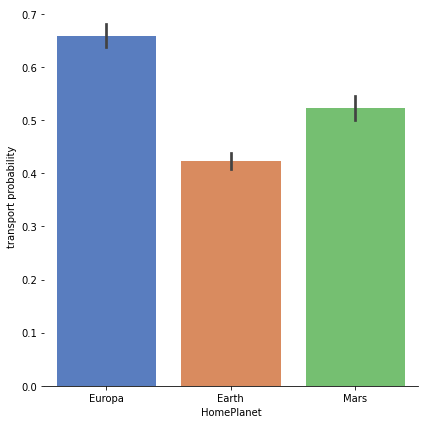

In [37]:
# Explore Parch feature vs Survived
g  = sns.factorplot(x="HomePlanet",y="Transported",data=df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("transport probability")

### CryoSleep

In [38]:
df.groupby('CryoSleep')['Transported'].mean()

CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: float64

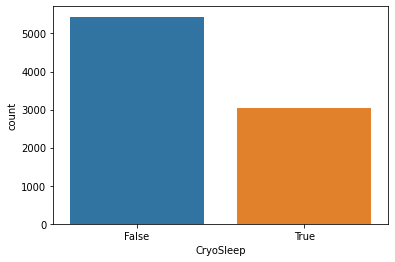

In [39]:
plt.figure()
sns.countplot(x = df['CryoSleep'])
plt.show()

### VIP

In [40]:
df.groupby('VIP')['Transported'].mean()

VIP
False    0.506332
True     0.381910
Name: Transported, dtype: float64

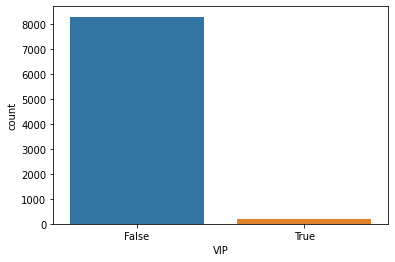

In [41]:
plt.figure()
sns.countplot(x = df['VIP'])
plt.show()

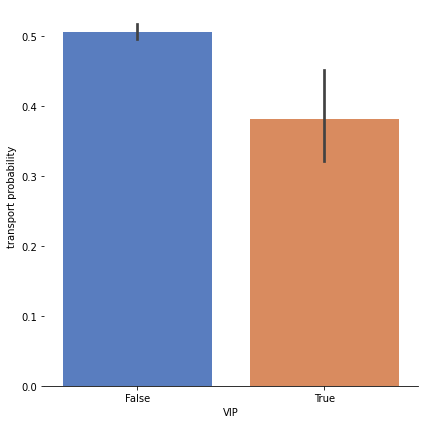

In [42]:
# Explore VIP feature vs Transported
g = sns.catplot(x="VIP",y="Transported",data=df,kind="bar", height = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("transport probability")

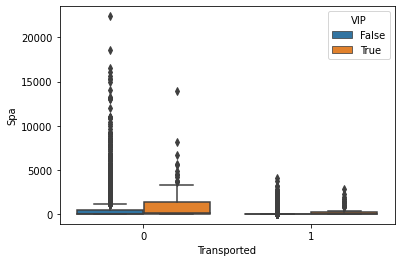

In [43]:
sns.boxplot(x="Transported", y="Spa", hue="VIP", data=df);

<AxesSubplot:>

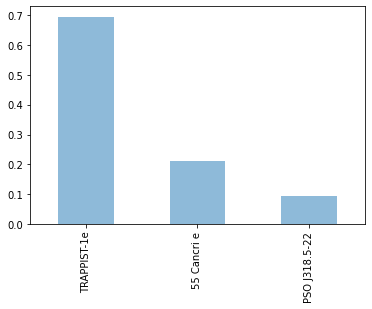

In [44]:
df.Destination.value_counts(normalize=True).plot(kind="bar", alpha = 0.5)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


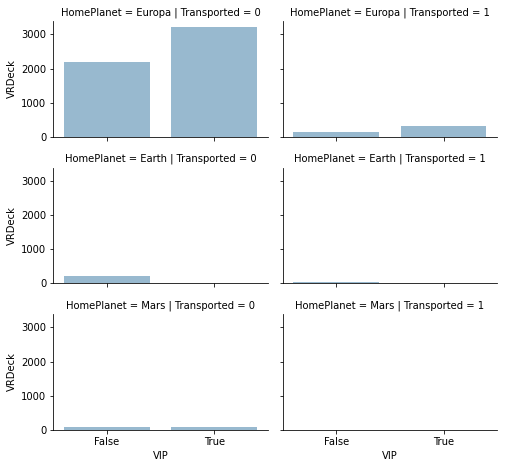

In [45]:
grid = sns.FacetGrid(df, row='HomePlanet', col='Transported', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'VIP', 'VRDeck', alpha=.5, ci=None)
grid.add_legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


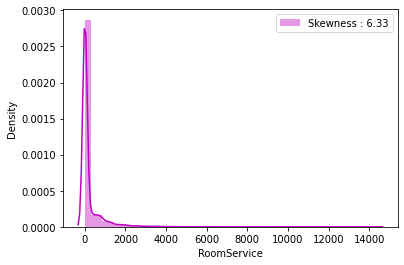

In [46]:
g = sns.distplot(df["RoomService"], color="m", label="Skewness : %.2f"%(df["RoomService"].skew()))
g = g.legend(loc="best")

In [47]:
plt.figure(figsize = (14,8))
#sns.heatmap(df.corr(), linewidths = 0.5, annot = True, fmt = ".2f", cmap = "coolwarm")

<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

In [48]:
df.corr()["Transported"].sort_values(ascending = False)

Transported     1.000000
FoodCourt       0.046566
ShoppingMall    0.010141
Age            -0.075026
VRDeck         -0.207075
Spa            -0.221131
RoomService    -0.244611
Name: Transported, dtype: float64

In [49]:
df.Cabin.str[0].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin, dtype: int64

In [50]:
df.Cabin.str[0].value_counts()


F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin, dtype: int64

In [51]:
df.Cabin.str[-1].value_counts()

S    4288
P    4206
Name: Cabin, dtype: int64

# Feature Engineering

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df.Transported, test_size=0.10, random_state=55)

In [53]:
y_train = X_train.pop('Transported')

In [54]:
def processData(df):
    
    df['totalMoneySpend'] = df.RoomService.fillna(df.RoomService.median()) + df.FoodCourt.fillna(df.FoodCourt.median()) + df.ShoppingMall.fillna(df.ShoppingMall.median()) + \
        df.Spa.fillna(df.Spa.median()) + df.VRDeck.fillna(df.VRDeck.median())

    df['familyName'] = df['Name'].str.split().str[-1]
    df['alone'] = ~df['familyName'].duplicated(keep=False)
    df.loc[df['alone'] == True, 'familyName'] = 'Single'
    df.loc[df.groupby('familyName')['familyName'].transform('count') < 10, 'familyName'] = 'Small Family'
    
    df['isChild'] = df['Age'] < 10
    df['isNewborn'] = df['Age'] <= 1
    
    df['cabinDeck'] = df.Cabin.str[0]
    df['cabinSide'] = df.Cabin.str[-1]
    
    return df

In [55]:
X_train = processData(X_train)
X_test = processData(X_test)
df_validation = processData(df_validation)

In [56]:
X_train.head(25)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,AgeBand,totalMoneySpend,familyName,alone,isChild,isNewborn,cabinDeck,cabinSide
PassengerId,,,,,,,,,,,,,,,,,,,,
8606_01,Earth,True,G/1386/S,TRAPPIST-1e,18.0,False,0.0,0.0,0.0,0.0,0.0,Tammyl Wolffy,"(9.875, 19.75]",0.0,Small Family,False,False,False,G,S
0978_01,Earth,False,F/203/P,TRAPPIST-1e,24.0,False,NaN,32.0,8.0,0.0,0.0,Lesley Coxterez,"(19.75, 29.625]",40.0,Small Family,False,False,False,F,P
1976_04,Europa,False,B/82/S,TRAPPIST-1e,39.0,False,1.0,2972.0,0.0,3175.0,1.0,Zinoth Lansuffle,"(29.625, 39.5]",6149.0,Small Family,False,False,False,B,S
0441_01,Earth,False,F/79/S,55 Cancri e,32.0,False,0.0,0.0,0.0,722.0,0.0,Loree Hahnstonsen,"(29.625, 39.5]",722.0,Small Family,False,False,False,F,S
1813_01,Earth,False,F/358/P,55 Cancri e,18.0,False,0.0,0.0,454.0,0.0,263.0,Allara Cainghannon,"(9.875, 19.75]",717.0,Small Family,False,False,False,F,P
2509_01,Earth,False,F/483/S,TRAPPIST-1e,43.0,False,0.0,9.0,1145.0,0.0,0.0,Wen Georgasey,"(39.5, 49.375]",1154.0,Georgasey,False,False,False,F,S
2814_01,NaN,True,G/455/P,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Fredy Smalloney,"(9.875, 19.75]",0.0,Small Family,False,False,False,G,P
6625_02,Earth,False,F/1379/P,55 Cancri e,15.0,False,3.0,854.0,23.0,0.0,0.0,Hughy Garden,"(9.875, 19.75]",880.0,Small Family,False,False,False,F,P
3204_01,Europa,False,A/27/P,TRAPPIST-1e,26.0,False,NaN,1653.0,7.0,227.0,1457.0,Sadra Wirdley,"(19.75, 29.625]",3344.0,Small Family,False,False,False,A,P


<AxesSubplot:>

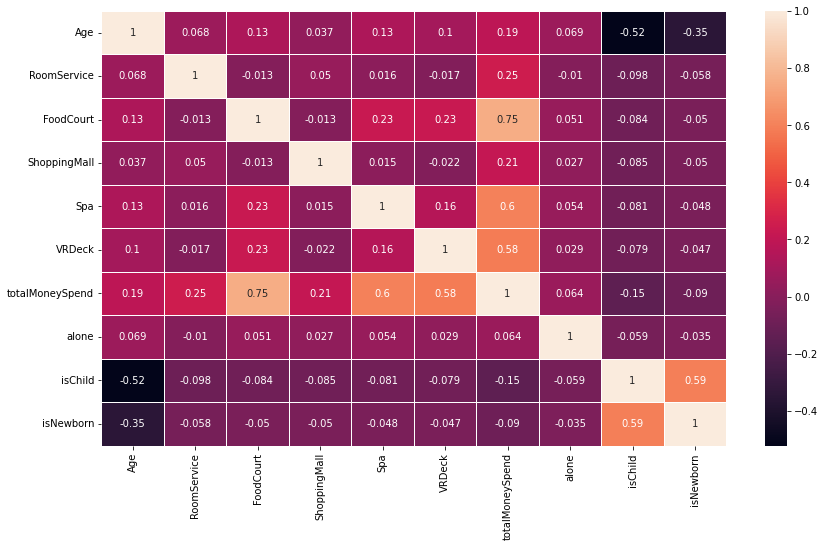

In [57]:
plt.figure(figsize = (14,8))
sns.heatmap(X_train.corr(), linewidths = 0.5, annot = True)

In [58]:
X_train.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,totalMoneySpend,alone,isChild,isNewborn
Age,1.000000,0.067613,0.130260,0.036940,0.128594,0.102097,0.188684,0.068768,-0.521540,-0.345367
RoomService,0.067613,1.000000,-0.012558,0.050093,0.016401,-0.016577,0.246583,-0.010491,-0.098132,-0.058214
FoodCourt,0.130260,-0.012558,1.000000,-0.013376,0.228456,0.232503,0.751676,0.050553,-0.084164,-0.050115
ShoppingMall,0.036940,0.050093,-0.013376,1.000000,0.015035,-0.022063,0.212832,0.026953,-0.084743,-0.050080
Spa,0.128594,0.016401,0.228456,0.015035,1.000000,0.160478,0.599937,0.053843,-0.081136,-0.048202
VRDeck,0.102097,-0.016577,0.232503,-0.022063,0.160478,1.000000,0.583011,0.029145,-0.078773,-0.046771
totalMoneySpend,0.188684,0.246583,0.751676,0.212832,0.599937,0.583011,1.000000,0.063846,-0.151222,-0.089708
alone,0.068768,-0.010491,0.050553,0.026953,0.053843,0.029145,0.063846,1.000000,-0.059484,-0.034800
isChild,-0.521540,-0.098132,-0.084164,-0.084743,-0.081136,-0.078773,-0.151222,-0.059484,1.000000,0.593223
isNewborn,-0.345367,-0.058214,-0.050115,-0.050080,-0.048202,-0.046771,-0.089708,-0.034800,0.593223,1.000000


In [59]:
X_train[X_train.alone == False].familyName.value_counts()

Small Family    6705
Oneiles           15
Casonston         15
Browlerson        14
Litthews          14
Briggston         13
Domington         13
Garnes            13
Hinglendez        13
Gibbsonton        12
Barbes            12
Morelly           11
Fowlesterez       11
Vloaf             11
Distured          11
Clugete           11
Buckentry         11
Fulloydez         11
Gouldensen        11
Wagnerray         11
Mosteraked        11
Fryersonis        11
Cartez            11
Gainney           11
Cofferson         10
Gainebergan       10
Dal               10
Mclardson         10
Tranciams         10
Wilsoney          10
Willy             10
Rilley            10
Vandan            10
Kiling            10
Jenson            10
Wartyson          10
Sageng            10
Moodman           10
Santry            10
Cardner           10
Coolerson         10
Guerson           10
Mckinsond         10
Fla               10
Georgasey         10
Hanner            10
Pittler           10
Yorkland     

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totalMoneySpend', ylabel='Density'>

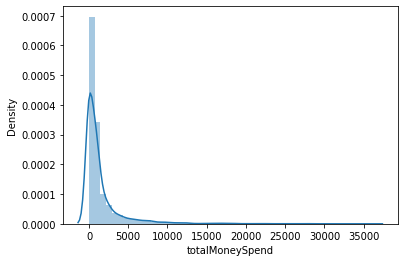

In [60]:
sns.distplot(X_train['totalMoneySpend'])

# Feature Selection

In [61]:
features = ['Age', 'RoomService', 'ShoppingMall', 'Spa', 'FoodCourt', 'VRDeck', 
            'isChild', 'VIP', 'CryoSleep', 'Destination', 'HomePlanet', 'cabinDeck',
           'cabinSide', 'totalMoneySpend', 'familyName', 'alone', 'isNewborn']

# Check different models

In [62]:
X_train[features]

,Age,RoomService,ShoppingMall,Spa,FoodCourt,VRDeck,isChild,VIP,CryoSleep,Destination,HomePlanet,cabinDeck,cabinSide,totalMoneySpend,familyName,alone,isNewborn
PassengerId,,,,,,,,,,,,,,,,,
8606_01,18.0,0.0,0.0,0.0,0.0,0.0,False,False,True,TRAPPIST-1e,Earth,G,S,0.0,Small Family,False,False
0978_01,24.0,NaN,8.0,0.0,32.0,0.0,False,False,False,TRAPPIST-1e,Earth,F,P,40.0,Small Family,False,False
1976_04,39.0,1.0,0.0,3175.0,2972.0,1.0,False,False,False,TRAPPIST-1e,Europa,B,S,6149.0,Small Family,False,False
0441_01,32.0,0.0,0.0,722.0,0.0,0.0,False,False,False,55 Cancri e,Earth,F,S,722.0,Small Family,False,False
1813_01,18.0,0.0,454.0,0.0,0.0,263.0,False,False,False,55 Cancri e,Earth,F,P,717.0,Small Family,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2783_01,21.0,0.0,0.0,0.0,0.0,0.0,False,False,True,55 Cancri e,Europa,D,P,0.0,Small Family,False,False
5856_01,NaN,0.0,0.0,0.0,0.0,0.0,False,False,True,55 Cancri e,Europa,B,P,0.0,Small Family,False,False
6553_01,39.0,0.0,0.0,0.0,0.0,744.0,False,False,False,PSO J318.5-22,Earth,F,P,744.0,Small Family,False,False


In [63]:
X_train[features].describe()

,Age,RoomService,ShoppingMall,Spa,FoodCourt,VRDeck,totalMoneySpend
count,7667.000000,7661.000000,7634.000000,7653.000000,7657.000000,7654.000000,7823.000000
mean,28.919656,226.440021,171.584228,308.940808,462.970354,303.648027,1441.651668
std,14.587209,675.117274,592.994107,1120.660438,1618.520930,1127.343626,2797.126893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,717.000000
75%,38.000000,46.000000,29.000000,59.000000,71.000000,46.750000,1444.000000
max,79.000000,14327.000000,23492.000000,22408.000000,27723.000000,24133.000000,35987.000000


In [64]:
X_train[features].dtypes

Age                 float64
RoomService         float64
ShoppingMall        float64
Spa                 float64
FoodCourt           float64
VRDeck              float64
isChild                bool
VIP                category
CryoSleep          category
Destination          object
HomePlanet           object
cabinDeck            object
cabinSide            object
totalMoneySpend     float64
familyName           object
alone                  bool
isNewborn              bool
dtype: object

# Pipeline

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE

categorical_features = X_train[features].select_dtypes(include=['object']).columns
numeric_features = X_train[features].select_dtypes(exclude=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    #,('skb', SelectKBest(f_classif))
    ])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    #,('skb', SelectKBest(chi2))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')

In [66]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier(),
    LogisticRegression(solver='lbfgs', max_iter=100)
]

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', classifier)])
    pipe.fit(X_train[features], y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))
    

KNeighborsClassifier(n_neighbors=3)
model score: 0.752
SVC(C=0.025, probability=True)
model score: 0.785
NuSVC(probability=True)
model score: 0.780
DecisionTreeClassifier()
model score: 0.722
RandomForestClassifier()
model score: 0.782
AdaBoostClassifier()
model score: 0.777
GradientBoostingClassifier()
model score: 0.792
[11:42:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
model score: 0.785
LogisticRegression()
model score: 0.787


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Grid searching best model

## Random Forest Classifier

In [67]:
# Random Forest
forest_pipeline = Pipeline(steps=[
                      #('feature_eng', general_cleaner),
                      ('preprocessor', preprocessor),
                      #('rfe', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=8)),
                      ('classifier', RandomForestClassifier())
                  ])

In [68]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['sqrt', 'auto']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
param_grid = {
                 "preprocessor__num__imputer__strategy": ["median"],
                 #'preprocessor__num__skb__k' : [5,7,9,11,13],
                 "preprocessor__cat__imputer__strategy": ["constant"],
                 #'preprocessor__cat__skb__k' : [5,7,9,11,13],
                 'classifier__n_estimators': n_estimators,
                 'classifier__max_features': max_features,
                 'classifier__max_depth': max_depth,
                 'classifier__min_samples_split': min_samples_split,
                 'classifier__min_samples_leaf': min_samples_leaf,
                 'classifier__criterion': ['gini', 'entropy'],
                 'classifier__bootstrap': bootstrap
             }

In [69]:
forest_grid_search = RandomizedSearchCV(forest_pipeline, param_grid, cv=5, n_iter=10, verbose=1)

# fine-tune the hyperparameters
forest_grid_search.fit(X_train[features], y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['Age', 'RoomService', 'ShoppingMall', 'Spa', 'FoodCourt', 'VRDeck',
       'isChild', 'VIP', 'CryoSleep', 'totalMoneySpend', 'alone', 'isNewb...
                                        'class

In [70]:
from sklearn import set_config

set_config(display='diagram')
forest_grid_search

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['Age', 'RoomService', 'ShoppingMall', 'Spa', 'FoodCourt', 'VRDeck',
       'isChild', 'VIP', 'CryoSleep', 'totalMoneySpend', 'alone', 'isNewb...
                                        'classifier__max_depth': [10, 20, 30,
                                                                  40, 50, 60,
                                                                  70, 80, 90,
                                                                  100, 110,
                                                                  None],
                                        'classifier__max_features': ['sqrt',
                                                                     'auto'],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [200, 400,
                                                                     600, 800,
                                                                     1000, 1200,
                                                                     1400, 1600,
                                                                     1800,
                                                                     2000],
                                        'preprocessor__cat__imputer__strategy': ['constant'],
                                        'preprocessor__num__imputer__strategy': ['median']},
                   verbose=1)

In [71]:
print("Tuned Hyperparameters :(best parameters) ",forest_grid_search.best_params_)
print("Best score :",forest_grid_search.best_score_)

Tuned Hyperparameters :(best parameters)  {'preprocessor__num__imputer__strategy': 'median', 'preprocessor__cat__imputer__strategy': 'constant', 'classifier__n_estimators': 1600, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 50, 'classifier__criterion': 'entropy', 'classifier__bootstrap': False}
Best score : 0.801607004240785


In [72]:
final_model_forest = forest_grid_search.best_estimator_

In [73]:
final_model_forest.score(X_test.loc[:, features], y_test)

0.7942528735632184

In [74]:
preds = final_model_forest.predict(X_test[features])

In [75]:
print(accuracy_score(y_test,preds))
print(recall_score(y_test,preds))
print(confusion_matrix(y_test,preds))

0.7942528735632184
0.8056206088992974
[[347  96]
 [ 83 344]]


In [76]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final_model_forest, X_test[features], y_test, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.03


## XGB Classifier

In [77]:
# Random Forest
xgb_pipeline = Pipeline(steps=[
                      #('feature_eng', general_cleaner),
                      ('preprocessor', preprocessor),
                      #('rfe', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=8)),
                      ('classifier', xgb.XGBClassifier())
                  ])

In [78]:
parameters = {
    "preprocessor__num__imputer__strategy": ["median"],
    #'preprocessor__num__skb__k' : [5,7,9,11,13],
    "preprocessor__cat__imputer__strategy": ["constant"],
    #'preprocessor__cat__skb__k' : [5,7,9,11,13],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.2, 0.3],
    'classifier__n_estimators': [50, 100, 150],
    'classifier__gamma': [0, 0.1, 0.2],
    'classifier__min_child_weight': [0, 0.5, 1],
    'classifier__max_delta_step': [0],
    'classifier__subsample': [0.7, 0.8, 0.9, 1],
    'classifier__colsample_bytree': [0.6, 0.8, 1],
    'classifier__colsample_bylevel': [1],
    'classifier__reg_alpha': [0, 1e-2, 1, 1e1],
    'classifier__reg_lambda': [0, 1e-2, 1, 1e1],
    'classifier__base_score': [0.5]
}

In [79]:
xgb_grid_search = RandomizedSearchCV(xgb_pipeline, parameters, cv=5, n_iter=10)

# fine-tune the hyperparameters
xgb_grid_search.fit(X_train[features], y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['Age', 'RoomService', 'ShoppingMall', 'Spa', 'FoodCourt', 'VRDeck',
       'isChild', 'VIP', 'CryoSleep', 'totalMoneySpend', 'alone', 'isNewb...
                                        'classifier__max_delta_step': [0],
                                        'classifier__max_depth': [3, 4, 5],
                                        'classifier__min_child_weight': [0, 0.5,
                                                                         1],
                                        'classifier__n_estimators': [50, 100,
                                                                     150],
                                        'classifier__reg_alpha': [0, 0.01, 1,
                                                                  10.0],
                                        'classifier__reg_lambda': [0, 0.01, 1,
                                                                   10.0],
                                        'classifier__subsample': [0.7, 0.8, 0.9,
                                                                  1],
                                        'preprocessor__cat__imputer__strategy': ['constant'],
                                        'preprocessor__num__imputer__strategy': ['median']})

In [80]:
from sklearn import set_config

set_config(display='diagram')
xgb_grid_search

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['Age', 'RoomService', 'ShoppingMall', 'Spa', 'FoodCourt', 'VRDeck',
       'isChild', 'VIP', 'CryoSleep', 'totalMoneySpend', 'alone', 'isNewb...
                                        'classifier__max_delta_step': [0],
                                        'classifier__max_depth': [3, 4, 5],
                                        'classifier__min_child_weight': [0, 0.5,
                                                                         1],
                                        'classifier__n_estimators': [50, 100,
                                                                     150],
                                        'classifier__reg_alpha': [0, 0.01, 1,
                                                                  10.0],
                                        'classifier__reg_lambda': [0, 0.01, 1,
                                                                   10.0],
                                        'classifier__subsample': [0.7, 0.8, 0.9,
                                                                  1],
                                        'preprocessor__cat__imputer__strategy': ['constant'],
                                        'preprocessor__num__imputer__strategy': ['median']})

In [81]:
print("Tuned Hyperparameters :(best parameters) ",xgb_grid_search.best_params_)
print("Best score :", xgb_grid_search.best_score_)

Tuned Hyperparameters :(best parameters)  {'preprocessor__num__imputer__strategy': 'median', 'preprocessor__cat__imputer__strategy': 'constant', 'classifier__subsample': 0.9, 'classifier__reg_lambda': 1, 'classifier__reg_alpha': 10.0, 'classifier__n_estimators': 150, 'classifier__min_child_weight': 1, 'classifier__max_depth': 5, 'classifier__max_delta_step': 0, 'classifier__learning_rate': 0.3, 'classifier__gamma': 0, 'classifier__colsample_bytree': 1, 'classifier__colsample_bylevel': 1, 'classifier__base_score': 0.5}
Best score : 0.8060814819051666


In [82]:
final_model_xgb = xgb_grid_search.best_estimator_

In [83]:
final_model_xgb.score(X_test.loc[:, features], y_test)

0.7919540229885057

In [84]:
preds = final_model_xgb.predict(X_test[features])

In [85]:
print(accuracy_score(y_test,preds))
print(recall_score(y_test,preds))
print(confusion_matrix(y_test,preds))

0.7919540229885057
0.8056206088992974
[[345  98]
 [ 83 344]]


In [86]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final_model_xgb, X_test[features], y_test, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:14:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.77 accuracy with a standard deviation of 0.03


## Ada Boost

In [87]:
# Random Forest
ada_pipeline = Pipeline(steps=[
                      #('feature_eng', general_cleaner),
                      ('preprocessor', preprocessor),
                      #('rfe', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=8)),
                      ('classifier', AdaBoostClassifier())
                  ])

In [88]:
parameters = {
    "preprocessor__num__imputer__strategy": ["median"],
    #'preprocessor__num__skb__k' : [5,7,9,11,13],
    "preprocessor__cat__imputer__strategy": ["constant"],
    #'preprocessor__cat__skb__k' : [5,7,9,11,13],
    'classifier__n_estimators':[10,50,250,1000],
    'classifier__learning_rate':[0.01,0.1]
}

In [89]:
ada_grid_search = RandomizedSearchCV(ada_pipeline, parameters, cv=5, n_iter=10)

# fine-tune the hyperparameters
ada_grid_search.fit(X_train[features], y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['Age', 'RoomService', 'ShoppingMall', 'Spa', 'FoodCourt', 'VRDeck',
       'isChild', 'VIP', 'CryoSleep', 'totalMoneySpend', 'alone', 'isNewb...
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               Index(['Destination', 'HomePlanet', 'cabinDeck', 'cabinSide', 'familyName'], dtype='object'))])),
                                             ('classifier',
                                              AdaBoostClassifier())]),
                   param_distributions={'classifier__learning_rate': [0.01,
                                                                      0.1],
                                        'classifier__n_estimators': [10, 50,
                                                                     250,
                                                                     1000],
                                        'preprocessor__cat__imputer__strategy': ['constant'],
                                        'preprocessor__num__imputer__strategy': ['median']})

In [90]:
from sklearn import set_config

set_config(display='diagram')
xgb_grid_search

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['Age', 'RoomService', 'ShoppingMall', 'Spa', 'FoodCourt', 'VRDeck',
       'isChild', 'VIP', 'CryoSleep', 'totalMoneySpend', 'alone', 'isNewb...
                                        'classifier__max_delta_step': [0],
                                        'classifier__max_depth': [3, 4, 5],
                                        'classifier__min_child_weight': [0, 0.5,
                                                                         1],
                                        'classifier__n_estimators': [50, 100,
                                                                     150],
                                        'classifier__reg_alpha': [0, 0.01, 1,
                                                                  10.0],
                                        'classifier__reg_lambda': [0, 0.01, 1,
                                                                   10.0],
                                        'classifier__subsample': [0.7, 0.8, 0.9,
                                                                  1],
                                        'preprocessor__cat__imputer__strategy': ['constant'],
                                        'preprocessor__num__imputer__strategy': ['median']})

In [91]:
print("Tuned Hyperparameters :(best parameters) ",ada_grid_search.best_params_)
print("Best score :", ada_grid_search.best_score_)

Tuned Hyperparameters :(best parameters)  {'preprocessor__num__imputer__strategy': 'median', 'preprocessor__cat__imputer__strategy': 'constant', 'classifier__n_estimators': 1000, 'classifier__learning_rate': 0.1}
Best score : 0.7904865871893972


In [92]:
final_model_ada = ada_grid_search.best_estimator_

In [93]:
final_model_ada.score(X_test.loc[:, features], y_test)

0.7908045977011494

In [94]:
preds = final_model_ada.predict(X_test[features])

In [95]:
print(accuracy_score(y_test,preds))
print(recall_score(y_test,preds))
print(confusion_matrix(y_test,preds))

0.7908045977011494
0.8360655737704918
[[331 112]
 [ 70 357]]


In [96]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final_model_ada, X_test[features], y_test, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.77 accuracy with a standard deviation of 0.03


### Feature Importances

In [97]:
onehot_columns = final_model_ada.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=categorical_features)

In [98]:
numeric_features_list = list(numeric_features)
numeric_features_list.extend(onehot_columns)

In [99]:
numeric_features_list

['Age',
 'RoomService',
 'ShoppingMall',
 'Spa',
 'FoodCourt',
 'VRDeck',
 'isChild',
 'VIP',
 'CryoSleep',
 'totalMoneySpend',
 'alone',
 'isNewborn',
 'Destination_55 Cancri e',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e',
 'Destination_missing_value',
 'HomePlanet_Earth',
 'HomePlanet_Europa',
 'HomePlanet_Mars',
 'HomePlanet_missing_value',
 'cabinDeck_A',
 'cabinDeck_B',
 'cabinDeck_C',
 'cabinDeck_D',
 'cabinDeck_E',
 'cabinDeck_F',
 'cabinDeck_G',
 'cabinDeck_T',
 'cabinDeck_missing_value',
 'cabinSide_P',
 'cabinSide_S',
 'cabinSide_missing_value',
 'familyName_Barbes',
 'familyName_Briggston',
 'familyName_Browlerson',
 'familyName_Buckentry',
 'familyName_Cardner',
 'familyName_Cartez',
 'familyName_Casonston',
 'familyName_Clugete',
 'familyName_Cofferson',
 'familyName_Coolerson',
 'familyName_Dal',
 'familyName_Distured',
 'familyName_Domington',
 'familyName_Fla',
 'familyName_Fowlesterez',
 'familyName_Fryersonis',
 'familyName_Fulloydez',
 'familyName_Gaine

In [100]:
import eli5
eli5.explain_weights(final_model_ada.named_steps['classifier'], top=50, feature_names=numeric_features_list, feature_filter=lambda x: x != '<BIAS>')

Weight,Feature
0.1320 ± 0.6770,totalMoneySpend
0.1110 ± 0.6283,VRDeck
0.1000 ± 0.6000,Spa
0.0880 ± 0.5666,FoodCourt
0.0760 ± 0.5300,RoomService
0.0710 ± 0.5136,ShoppingMall
0.0630 ± 0.4859,Age
0.0400 ± 0.3919,CryoSleep
0.0380 ± 0.3824,cabinDeck_C
0.0290 ± 0.3356,cabinDeck_G


In [101]:
'''
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train[features].columns, final_model_forest.named_steps['classifier'].feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
'''

"\nfeats = {} # a dict to hold feature_name: feature_importance\nfor feature, importance in zip(X_train[features].columns, final_model_forest.named_steps['classifier'].feature_importances_):\n    feats[feature] = importance #add the name/value pair \n\nimportances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})\nimportances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)\n"

# Predictions

In [102]:
df_validation

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,totalMoneySpend,familyName,alone,isChild,isNewborn,cabinDeck,cabinSide
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0,Small Family,False,False,False,G,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,2832.0,Single,True,False,False,F,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0,Single,True,False,False,C,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,7418.0,Single,True,False,False,C,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,645.0,Small Family,False,False,False,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,0.0,Small Family,False,False,False,G,S
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,1018.0,Small Family,False,False,False,NaN,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0.0,Small Family,False,False,False,D,P
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,3203.0,Small Family,False,False,False,D,P


In [103]:
y_pred = final_model_xgb.predict(df_validation[features])
len(df_validation)
len(y_pred)

4277

In [104]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

# Create CSV

In [105]:
my_submission = pd.DataFrame({'PassengerId': df_validation.PassengerId, 'Transported': y_pred.astype('bool')})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [106]:
my_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
